# Creating dataset with sliding windows & Model building
PNT2022TMID26965

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
ds=pd.read_csv(r"/content/Crude-Oil-Prices-Daily.csv",parse_dates =["Date"], index_col ="Date") 
ds.head()
ds[:10]

,Closing Value
Date,
1986-01-02,25.56
1986-01-03,26.00
1986-01-06,26.53
1986-01-07,25.85
1986-01-08,25.87
1986-01-09,26.03
1986-01-10,25.65
1986-01-13,25.08
1986-01-14,24.97


In [2]:
ds.isnull().sum()

Closing Value    7
dtype: int64

In [3]:
ds.dropna(axis=0,inplace=True)
ds.isnull().sum()

Closing Value    0
dtype: int64

In [4]:
data=ds.reset_index()['Closing Value']
data

0       25.56
1       26.00
2       26.53
3       25.85
4       25.87
        ...  
8211    73.89
8212    74.19
8213    73.05
8214    73.78
8215    73.93
Name: Closing Value, Length: 8216, dtype: float64

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
data=scaler.fit_transform(np.array(data).reshape(-1,1))
data

array([[0.11335703],
       [0.11661484],
       [0.12053902],
       ...,
       [0.46497853],
       [0.47038353],
       [0.47149415]])

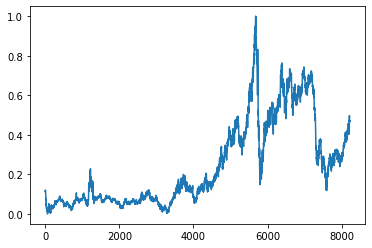

In [6]:
plt.plot(data)

In [7]:
training_size=int(len(data)*0.65)
test_size=len(data)-training_size
train_data,test_data=data[0:training_size,:],data[training_size:len(data),:1]
training_size,test_size

(5340, 2876)

In [8]:
train_data.shape

(5340, 1)

In [9]:
def create_dataset(dataset,time_step=1):
  dataX,dataY=[],[]
  for i in range(len(dataset)-time_step-1):
    a=dataset[i:(i+time_step),0]
    dataX.append(a)
    dataY.append(dataset[i+time_step,0])
  return np.array(dataX),np.array(dataY)

In [10]:
time_step=10
x_train,y_train=create_dataset(train_data,time_step)
x_test,y_test=create_dataset(test_data,time_step)
print(x_train.shape)
print(y_train.shape)

(5329, 10)
(5329,)


In [11]:
print(x_test.shape)
print(y_test.shape)

(2865, 10)
(2865,)


In [12]:
x_train

array([[0.11335703, 0.11661484, 0.12053902, ..., 0.10980305, 0.1089886 ,
        0.11054346],
       [0.11661484, 0.12053902, 0.11550422, ..., 0.1089886 , 0.11054346,
        0.10165852],
       [0.12053902, 0.11550422, 0.1156523 , ..., 0.11054346, 0.10165852,
        0.09906708],
       ...,
       [0.36731823, 0.35176958, 0.36080261, ..., 0.36391234, 0.37042796,
        0.37042796],
       [0.35176958, 0.36080261, 0.35354657, ..., 0.37042796, 0.37042796,
        0.37879461],
       [0.36080261, 0.35354657, 0.35295424, ..., 0.37042796, 0.37879461,
        0.37916482]])

In [13]:
x_test

array([[0.38005331, 0.36872501, 0.37324152, ..., 0.3537687 , 0.35465719,
        0.3499926 ],
       [0.36872501, 0.37324152, 0.38205242, ..., 0.35465719, 0.3499926 ,
        0.3465867 ],
       [0.37324152, 0.38205242, 0.38042352, ..., 0.3499926 , 0.3465867 ,
        0.34355101],
       ...,
       [0.40604176, 0.41218718, 0.41041019, ..., 0.46794017, 0.47297497,
        0.47119799],
       [0.41218718, 0.41041019, 0.43513994, ..., 0.47297497, 0.47119799,
        0.47341922],
       [0.41041019, 0.43513994, 0.4417296 , ..., 0.47119799, 0.47341922,
        0.46497853]])

In [14]:
x_train1=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)
x_train1

array([[[0.11335703],
        [0.11661484],
        [0.12053902],
        ...,
        [0.10980305],
        [0.1089886 ],
        [0.11054346]],

       [[0.11661484],
        [0.12053902],
        [0.11550422],
        ...,
        [0.1089886 ],
        [0.11054346],
        [0.10165852]],

       [[0.12053902],
        [0.11550422],
        [0.1156523 ],
        ...,
        [0.11054346],
        [0.10165852],
        [0.09906708]],

       ...,

       [[0.36731823],
        [0.35176958],
        [0.36080261],
        ...,
        [0.36391234],
        [0.37042796],
        [0.37042796]],

       [[0.35176958],
        [0.36080261],
        [0.35354657],
        ...,
        [0.37042796],
        [0.37042796],
        [0.37879461]],

       [[0.36080261],
        [0.35354657],
        [0.35295424],
        ...,
        [0.37042796],
        [0.37879461],
        [0.37916482]]])

# Model building
## Importing model building libraries

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

## Initializing the model

In [16]:
model=Sequential()

## Adding LSTM and output layers

In [17]:
model.add(LSTM(50,return_sequences=True,input_shape=(10,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))

In [18]:
model.add(Dense(1))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 10, 50)            20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


## Configuring the learning process

In [20]:
model.compile(loss='mean_squared_error',optimizer='adam')

## Model training 

In [21]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=3,batch_size=64,verbose=1)

Epoch 1/3
84/84 [==============================] - 10s 48ms/step - loss: 0.0021 - val_loss: 0.0011
Epoch 2/3
84/84 [==============================] - 3s 30ms/step - loss: 1.3056e-04 - val_loss: 7.6737e-04
Epoch 3/3
84/84 [==============================] - 2s 29ms/step - loss: 1.2407e-04 - val_loss: 7.6907e-04


## Evaluation

In [23]:
train_predict=scaler.inverse_transform(train_data) 
test_predict=scaler.inverse_transform(test_data)

In [24]:
import math 
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(train_data,train_predict))

29.347830443269938

## Model saving

In [26]:
from tensorflow.keras.models import load_model

In [27]:
model.save("crude_oil.hs")

## Model testing

In [28]:
look_back=10
trainpredictPlot = np.empty_like(data)
trainpredictPlot[:, :]= np.nan
trainpredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

In [29]:
testPredictplot = np.empty_like(data)
testPredictplot[:,: ] = np.nan
testPredictplot[look_back:len(test_predict)+look_back, :] = test_predict

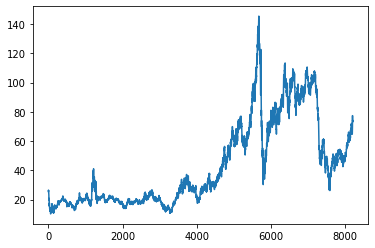

In [30]:
plt.plot(scaler.inverse_transform(data))
plt.show()

In [31]:
len(test_data)

2876

In [32]:
x_input=test_data[2866:].reshape(1,-1)
x_input.shape

(1, 10)

In [33]:
temp_input=list(x_input) 
temp_input=temp_input[0].tolist()
temp_input

[0.44172960165852215,
 0.48111950244335855,
 0.49726047682511476,
 0.4679401747371539,
 0.4729749740855915,
 0.47119798608026064,
 0.47341922108692425,
 0.4649785280616022,
 0.4703835332444839,
 0.47149415074781587]

In [34]:
lst_output=[]
n_steps=10
i=0
while(i<10):
    if(len(temp_input)>10):
       x_input=np.array(temp_input[1:]) 
       print("{} day input {}".format(i,x_input))
       x_input=x_input.reshape(1,-1)
       x_input = x_input.reshape((1, n_steps, 1)) 
       yhat = model.predict(x_input, verbose=0)
       print("{} day output {}".format(i,yhat))
       temp_input.extend(yhat[0].tolist())
       temp_input=temp_input[1:] 
       lst_output.extend(yhat.tolist())
       i=i+1
    else:
       x_input = x_input.reshape((1, n_steps,1))
       yhat = model.predict(x_input, verbose=0)
       print(yhat[0])
       temp_input.extend(yhat[0].tolist()) 
       print(len(temp_input))
       lst_output.extend(yhat.tolist())
       i=i+1

[0.4779267]
11
1 day input [0.4811195  0.49726048 0.46794017 0.47297497 0.47119799 0.47341922
 0.46497853 0.47038353 0.47149415 0.4779267 ]
1 day output [[0.48198324]]
2 day input [0.49726048 0.46794017 0.47297497 0.47119799 0.47341922 0.46497853
 0.47038353 0.47149415 0.4779267  0.48198324]
2 day output [[0.48077223]]
3 day input [0.46794017 0.47297497 0.47119799 0.47341922 0.46497853 0.47038353
 0.47149415 0.4779267  0.48198324 0.48077223]
3 day output [[0.4776754]]
4 day input [0.47297497 0.47119799 0.47341922 0.46497853 0.47038353 0.47149415
 0.4779267  0.48198324 0.48077223 0.47767541]
4 day output [[0.47881684]]
5 day input [0.47119799 0.47341922 0.46497853 0.47038353 0.47149415 0.4779267
 0.48198324 0.48077223 0.47767541 0.47881684]
5 day output [[0.4794408]]
6 day input [0.47341922 0.46497853 0.47038353 0.47149415 0.4779267  0.48198324
 0.48077223 0.47767541 0.47881684 0.47944081]
6 day output [[0.4804469]]
7 day input [0.46497853 0.47038353 0.47149415 0.4779267  0.48198324 0.4

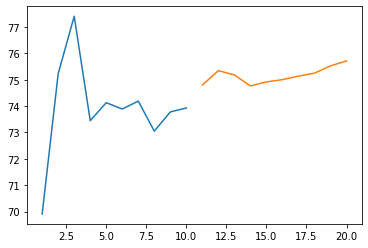

In [35]:
day_new=np.arange(1,11) 
day_pred=np.arange(11,21)
len(data)
plt.plot(day_new, scaler.inverse_transform(data[8206:])) 
plt.plot(day_pred, scaler.inverse_transform(lst_output))

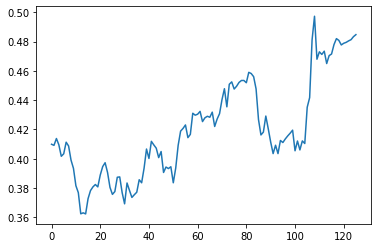

In [36]:
df3=data.tolist() 
df3.extend(lst_output) 
plt.plot(df3[8100:])

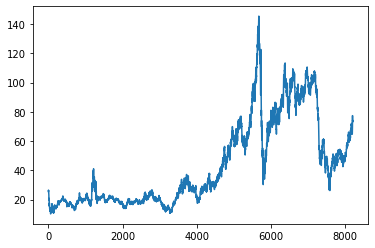

In [37]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(scaler.inverse_transform(data))